# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


NO NULL DATA

How many rows and columns are in our data?

In [5]:
print(f'There is {len(sensor)} rows')
print(f'There is {len(sensor.columns)} columns')

There is 1751 rows
There is 12 columns


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:
new_index = pd.date_range(start = '1/1/2018 00:00:0', end = '1/1/2018 00:29:10', periods = len(sensor))

Assign the time series index to the dataframe's index.

In [7]:
# Your code here:
sensor['new_index']= new_index
sensor = sensor.set_index([new_index])
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,new_index
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [8]:
sensor.columns = sensor.columns.str.replace('.', '_')

<ipython-input-8-256f46ac67e4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sensor.columns = sensor.columns.str.replace('.', '_')


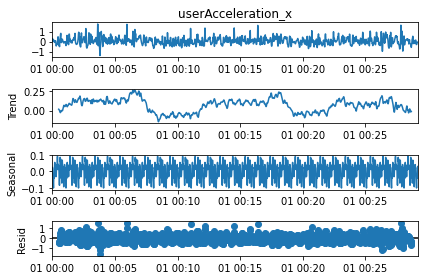

In [9]:
# Your code here:
res = seasonal_decompose(sensor.userAcceleration_x, model="additive", period = 60)
res.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

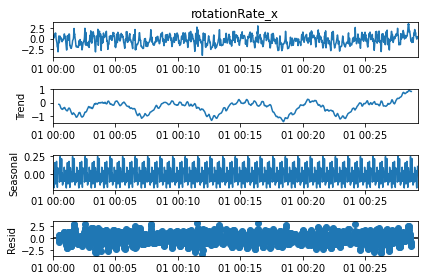

In [10]:
res_2 = seasonal_decompose(sensor.rotationRate_x, model="additive", period = 60)
res_2.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

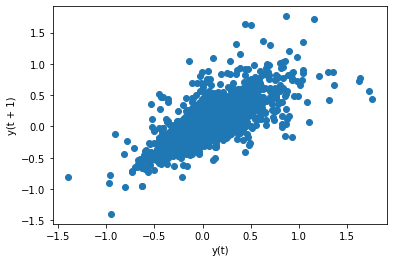

In [11]:
# Your code here:
lag_plot(sensor.userAcceleration_x)

Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

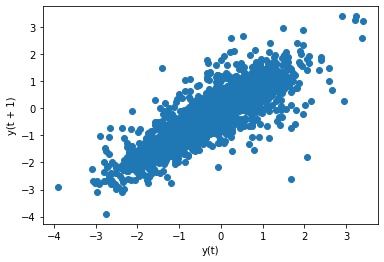

In [12]:
lag_plot(sensor.rotationRate_x)

What are your conclusions from both visualizations?

There is a very strong correlation in both variables with their lag value. With high values en userAcceleration is smaller.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

<AxesSubplot:>

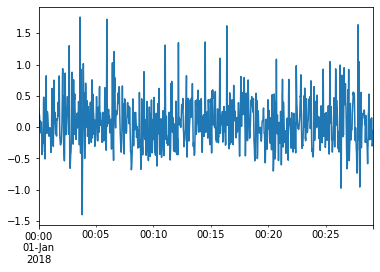

In [13]:
sensor.userAcceleration_x.plot()

In [14]:
len(sensor.userAcceleration_x)

1751

In [15]:
# Your code here:
adf_test = ADFTest()
adf_test.should_diff(sensor.userAcceleration_x)

(0.01, False)

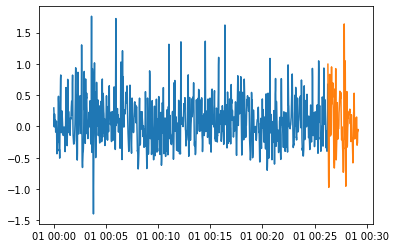

In [16]:
train = sensor.userAcceleration_x[:(round(len(sensor.userAcceleration_x)*0.9))]
test = sensor.userAcceleration_x[-(round(len(sensor.userAcceleration_x)*0.1)):]

plt.plot(train)
plt.plot(test)

In [17]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=2, max_d=2, max_q=2, start_P=0, 
                          D=1, start_Q=0, max_P=2, max_D=2,
                          max_Q=2, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=882.752, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=325.629, Time=0.89 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.58 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=729.867, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=137.570, Time=1.54 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=17.51 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=5.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=302.919, Time=1.17 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-95.189, Time=2.69 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=126.727, Time=1.13 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=28.91 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=8.54 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=19.26 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=30.307, Time=2.67 sec
 ARIMA(2,1,0)(2,1,0)[12] intercept   : AIC=-93.196, Tim

In [18]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1576
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                  52.595
Date:                            Wed, 28 Apr 2021   AIC                            -95.189
Time:                                    00:26:50   BIC                            -68.417
Sample:                                         0   HQIC                           -85.236
                                           - 1576                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4385      0.017     25.976      0.000       0.405       0.472
ar.L2         -0.3751      0.019    -19.628      0.000      -0.413      -0.338
ar.S.L12      -0.6583      0.017    -37.781      0.000      -0.692      -0.624
ar.S.L24      -0.3673      0.018    -20.054      0.000      -0.403      -0.331
sigma2         0.0545      0.001     40.987      0.000       0.052       0.057
===================================================================================
Ljung-Box (L1) (Q):                   4.49   Jarque-Bera (JB):               957.16
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
prediction = pd.DataFrame(arima_model.predict(n_periods = (round(len(sensor.userAcceleration_x)*0.1))),index=test.index)
prediction.columns = ['predicted_userAcceleration_x']
prediction

,predicted_userAcceleration_x
2018-01-01 00:26:16,0.996888
2018-01-01 00:26:17,0.943213
2018-01-01 00:26:18,0.754551
2018-01-01 00:26:19,0.704806
2018-01-01 00:26:20,0.806487
...,...
2018-01-01 00:29:06,5.442920
2018-01-01 00:29:07,5.334329
2018-01-01 00:29:08,5.386262
2018-01-01 00:29:09,5.499220


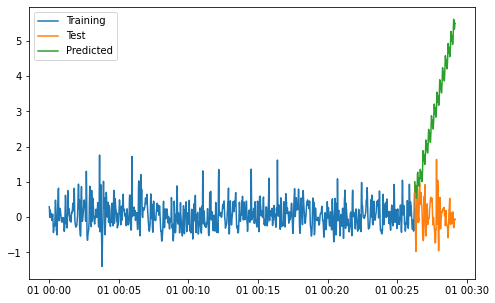

In [22]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [23]:
adf_test = ADFTest()
adf_test.should_diff(sensor.rotationRate_x)

(0.01, False)

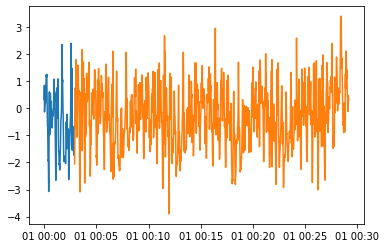

In [26]:
train = sensor.rotationRate_x[:(round(len(sensor.rotationRate_x)*0.1))]
test = sensor.rotationRate_x[-(round(len(sensor.rotationRate_x)*0.9)):]

plt.plot(train)
plt.plot(test)

In [28]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=2, max_d=2, max_q=2, start_P=0, 
                          D=1, start_Q=0, max_P=2, max_D=2,
                          max_Q=2, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=442.310, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=340.371, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=427.928, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=322.913, Time=0.25 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=315.494, Time=0.32 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=317.087, Time=1.12 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=316.609, Time=0.65 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=2.47 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=324.160, Time=0.23 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=281.053, Time=0.78 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=303.380, T

In [29]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  175
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -135.526
Date:                              Wed, 28 Apr 2021   AIC                            281.053
Time:                                      00:29:46   BIC                            296.491
Sample:                                           0   HQIC                           287.321
                                              - 175                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3664      0.047      7.764      0.000       0.274       0.459
ar.L2         -0.4597      0.046    -10.088      0.000      -0.549      -0.370
ar.S.L12      -0.2926      0.120     -2.430      0.015      -0.529      -0.057
ma.S.L12      -0.8700      0.180     -4.845      0.000      -1.222      -0.518
sigma2         0.2693      0.030      9.105      0.000       0.211       0.327
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                42.50
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               1.92   Skew:                             0.16
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
prediction = pd.DataFrame(arima_model.predict(n_periods = (round(len(sensor.rotationRate_x)*0.9))),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
2018-01-01 00:02:55,-1.111405
2018-01-01 00:02:56,-1.051648
2018-01-01 00:02:57,-1.006652
2018-01-01 00:02:58,-1.061119
2018-01-01 00:02:59,-0.817233
...,...
2018-01-01 00:29:06,-10.866817
2018-01-01 00:29:07,-10.780320
2018-01-01 00:29:08,-10.930253
2018-01-01 00:29:09,-10.978433


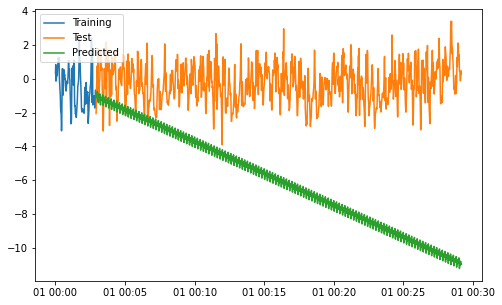

In [31]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

What are your conclusions from this test?

I cant make it work...

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [36]:
# Your code here:
train = sensor.userAcceleration_x[:1741]
test = sensor.userAcceleration_x[-10:]

arima_model =  auto_arima(train,start_p=0, d=0, start_q=0, 
                          max_p=2, max_d=2, max_q=2, start_P=0, 
                          D=0, start_Q=0, max_P=2, max_D=2,
                          max_Q=2, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1231.680, Time=0.22 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-262.713, Time=0.53 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-135.577, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1287.921, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-262.016, Time=0.14 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=-260.726, Time=2.09 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-260.701, Time=0.73 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-262.724, Time=0.58 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=-260.727, Time=2.13 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=-258.727, Time=2.42 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1231.895, Time=0.83 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=-723.190, Time=0.85 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=-724.865, Time=0.30 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=-723.200, Time=1.02 sec
 ARIMA(2,0,0)(1,0,1

In [41]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 10,index=test.index))
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
0,0.173142
1,0.142885
2,0.100509
3,0.070091
4,0.056083
5,0.053761
6,0.056773
7,0.060629
8,0.063299
9,0.064477


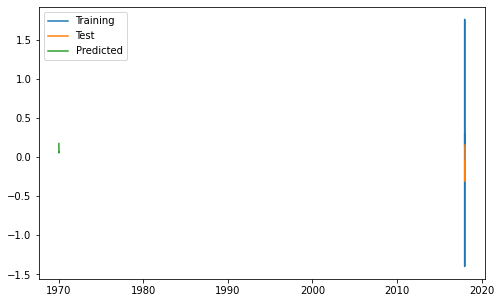

In [42]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [ ]:
# Your code here:

